We will be working with data from clients of a wholesale distributor. The prices are in Monetary Units (m.u.), and there are 8 features in this dataset:

1. FRESH: annual spending on fresh products. 
2. MILK: annual spending on milk products. 
3. GROCERY: annual spending on grocery products. 
4. FROZEN: annual spending on frozen products. 
5. DETERGENTS_PAPER: annual spending on detergents and paper products. 
6. DELICATESSEN: annual spending on and delicatessen products. 
7. CHANNEL: customes type - Horeca (Hotel/Restaurant/Cafe) or Retail. 
8. REGION: customer region - Lisnon, Oporto, or Other

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
#import dataframe
wholesale = pd.read_csv('Data/wholesale_data.csv')

In [3]:
wholesale.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,12669,9656,7561,214,2674,1338
1,Retail,7057,9810,9568,1762,3293,1776
2,Retail,6353,8808,7684,2405,3516,7844
3,Horeca,13265,1196,4221,6404,507,1788
4,Retail,22615,5410,7198,3915,1777,5185


In [4]:
#inspect dataframe
wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Fresh             440 non-null    int64 
 2   Milk              440 non-null    int64 
 3   Grocery           440 non-null    int64 
 4   Frozen            440 non-null    int64 
 5   Detergents_Paper  440 non-null    int64 
 6   Delicassen        440 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 24.2+ KB


In [5]:
wholesale.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
wholesale.nunique()

Channel               2
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [7]:
#one-hot encode categorical feature
channel_onehot = pd.get_dummies(wholesale['Channel'])
new_wholesale = pd.concat([wholesale, channel_onehot], axis = 1)
new_wholesale.drop('Channel', axis = 1, inplace = True)

In [8]:
new_wholesale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail
0,12669,9656,7561,214,2674,1338,0,1
1,7057,9810,9568,1762,3293,1776,0,1
2,6353,8808,7684,2405,3516,7844,0,1
3,13265,1196,4221,6404,507,1788,1,0
4,22615,5410,7198,3915,1777,5185,0,1


In [9]:
#standardize your data
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
wholesale_stand = scaler.fit_transform(new_wholesale)

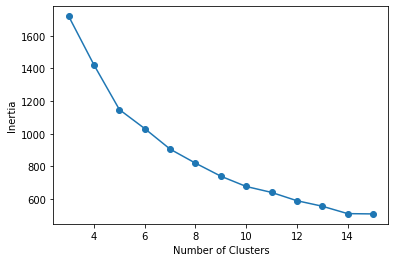

In [11]:
#storing inertia and silhouette score to evaluate each cluster
inertia_values = []
silhouette_scores = []

#looking at different values for k
for k in range(3, 16):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(wholesale_stand) 
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(wholesale_stand, kmeans.labels_))

#visualize inertia 
plt.plot(range(3,16), inertia_values, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



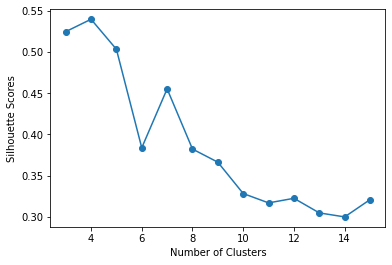

In [12]:
#visualize inertia 
plt.plot(range(3,16), silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.show();

In [13]:
#run the k-means algorithm 
kmeans = KMeans(n_clusters = 4)
kmeans.fit(wholesale_stand)

#add cluster column to dataframe
wholesale['cluster'] = kmeans.labels_

In [14]:
wholesale.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,Retail,12669,9656,7561,214,2674,1338,1
1,Retail,7057,9810,9568,1762,3293,1776,1
2,Retail,6353,8808,7684,2405,3516,7844,1
3,Horeca,13265,1196,4221,6404,507,1788,0
4,Retail,22615,5410,7198,3915,1777,5185,1


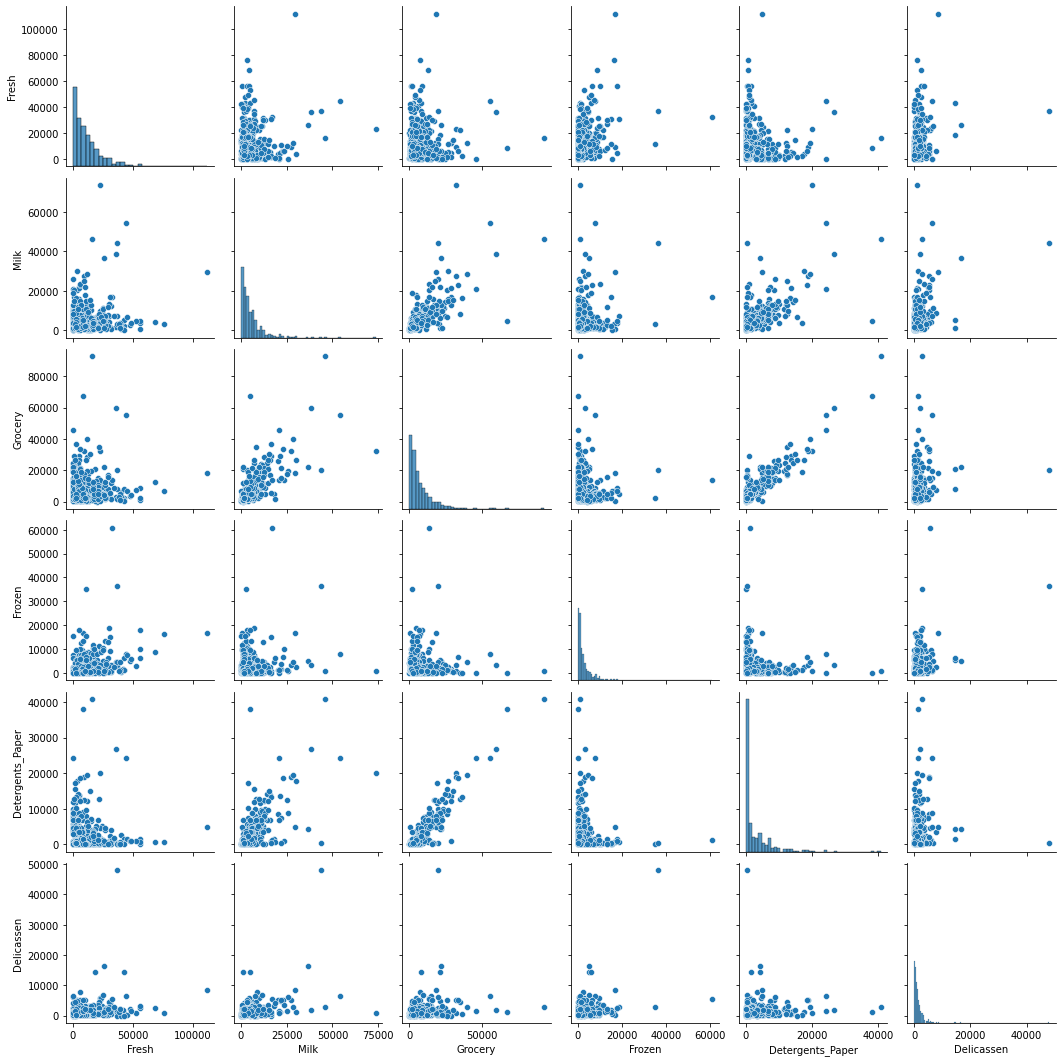

In [16]:
df = wholesale[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'cluster']].copy()
sns.pairplot(df, vars=df.columns[:-1])
plt.show();